# Precipitation

https://towardsdatascience.com/handling-netcdf-files-using-xarray-for-absolute-beginners-111a8ab4463f

In [1]:
! ls

00-aoi-delaware-river-plus-modis-ndvi-animation.ipynb
000-air-temperature.ipynb
001-precipitation.ipynb
002-soil-data.ipynb
01-aoi-delaware-river-plus-modis-ndvi-animation-Copy1.ipynb
10-bucket-ga-et-data-analysis.ipynb
20-modis-scale-cole.ipynb
2016.out
80-play-with-rio.ipynb
POLYGON.shp
Readme.md
delaware.tif
delaware_river_basin.geojson
output.tif


In [2]:
! aws s3 ls ga-et-data/inputsv0/

                           PRE MODIS_NDVI/
                           PRE air_temperature/
                           PRE precipitation/
                           PRE soilData/


In [3]:
! aws s3 ls ga-et-data/inputsv0/precipitation/ | head

                           PRE netcdf/
                           PRE tiff/


In [4]:
! aws s3 ls ga-et-data/inputsv0/precipitation/netcdf/

2020-02-26 05:05:50   54739982 pr_2013.nc
2020-02-26 05:05:50   57777033 pr_2014.nc
2020-02-26 05:05:50   61958423 pr_2015.nc
2020-02-26 05:05:50   62976390 pr_2016.nc


In [5]:
# blank

In [6]:
'''
import xarray as xr# single file
dataDIR = '/vsis3/ga-et-data/inputsv0/precipitation/netcdf/pr_2016.nc'
DS = xr.open_dataset(dataDIR)
'''

"\nimport xarray as xr# single file\ndataDIR = '/vsis3/ga-et-data/inputsv0/precipitation/netcdf/pr_2016.nc'\nDS = xr.open_dataset(dataDIR)\n"

In [7]:
! aws s3 ls s3://ga-et-data/inputsv0/precipitation/netcdf/pr_2016.nc --human

2020-02-26 05:05:50   60.1 MiB pr_2016.nc


In [8]:
! ls /tmp

core-js-banners
hellotony.txt
namespace-dev-4SPqhm
namespace-dev-lyA8J8
npm-17138-34bd1c1b
pr_2016.nc
systemd-private-ce204d9c04eb45508fb15aa72f95b161-jupyterhub.service-PMv7GV
systemd-private-ce204d9c04eb45508fb15aa72f95b161-systemd-resolved.service-KNQlMD
systemd-private-ce204d9c04eb45508fb15aa72f95b161-systemd-timesyncd.service-iB6VoI
systemd-private-ce204d9c04eb45508fb15aa72f95b161-traefik.service-xujOT8
tmp7fq4wuga
tmplaz7akie
v8-compile-cache-0
yarn--1582833220367-0.9625017254828843
yarn--1582833221459-0.4661784606221018
yarn--1582833222708-0.9278611190942783


In [9]:
#!time aws s3 cp s3://ga-et-data/inputsv0/precipitation/netcdf/pr_2016.nc /tmp

In [10]:
!ls /tmp/pr*

/tmp/pr_2016.nc


In [11]:
import xarray as xr# single file
dataDIR = '/tmp/pr_2016.nc'
DS = xr.open_dataset(dataDIR)

/home/jupyter-butzer/.local/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'precipitation_amount' has _Unsigned attribute but is not of integer type. Ignoring attribute.
  use_cftime=use_cftime,


In [12]:
DS

<xarray.Dataset>
Dimensions:               (crs: 1, day: 366, lat: 585, lon: 1386)
Coordinates:
  * lon                   (lon) float64 -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat                   (lat) float64 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day                   (day) datetime64[ns] 2016-01-01 ... 2016-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [13]:
DS.dims

Frozen(SortedKeysDict({'lon': 1386, 'lat': 585, 'day': 366, 'crs': 1}))

In [14]:
# Noice! - 366 days over a bunch of lat longs - Preciptation - Fantastic

In [15]:
DS.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:               (crs: 1, day: 366, lat: 585, lon: 1386)
Coordinates:
  * lon                   (lon) float64 -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat                   (lat) float64 49.4 49.36 49.32 ... 25.15 25.11 25.07
  * day                   (day) datetime64[ns] 2016-01-01 ... 2016-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (day, lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north

In [16]:
# Select data 
da = DS[dict(crs=0, day=365, lat=584, lon=1385)]
#da_numpy = da.values

In [17]:
# slice to one day - still the whole world
da

<xarray.Dataset>
Dimensions:               ()
Coordinates:
    lon                   float64 -67.06
    lat                   float64 25.07
    day                   datetime64[ns] 2016-12-31
    crs                   uint16 3
Data variables:
    precipitation_amount  float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [18]:
da['precipitation_amount']

<xarray.DataArray 'precipitation_amount' ()>
array(nan, dtype=float32)
Coordinates:
    lon      float64 -67.06
    lat      float64 25.07
    day      datetime64[ns] 2016-12-31
    crs      uint16 3
Attributes:
    units:              mm
    description:        Daily Accumulated Precipitation
    long_name:          pr
    standard_name:      pr
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

In [19]:
da['precipitation_amount']

<xarray.DataArray 'precipitation_amount' ()>
array(nan, dtype=float32)
Coordinates:
    lon      float64 -67.06
    lat      float64 25.07
    day      datetime64[ns] 2016-12-31
    crs      uint16 3
Attributes:
    units:              mm
    description:        Daily Accumulated Precipitation
    long_name:          pr
    standard_name:      pr
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

In [20]:
da['precipitation_amount'].values

array(nan, dtype=float32)

In [21]:
db = DS.loc[dict(day='2016-12-31')]

# The above attempt was not quite right - this looks better

In [22]:
db

<xarray.Dataset>
Dimensions:               (crs: 1, lat: 585, lon: 1386)
Coordinates:
  * lon                   (lon) float64 -124.8 -124.7 -124.7 ... -67.1 -67.06
  * lat                   (lat) float64 49.4 49.36 49.32 ... 25.15 25.11 25.07
    day                   datetime64[ns] 2016-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [23]:
dc = db.loc[dict(lon=slice(-90.1, -90.3))]

# No longitudes so this slicing method wont work either

In [24]:
dc

<xarray.Dataset>
Dimensions:               (crs: 1, lat: 585, lon: 0)
Coordinates:
  * lon                   (lon) float64 
  * lat                   (lat) float64 49.4 49.36 49.32 ... 25.15 25.11 25.07
    day                   datetime64[ns] 2016-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (lat, lon) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [25]:
dc['precipitation_amount'].values

array([], shape=(585, 0), dtype=float32)

In [26]:
lons = DS['lon'].values

In [27]:
type(lons)

numpy.ndarray

# Lets try a different approach - selecting by exact values

## But what values?

### How about the closest to our city of interest

### In this case Sioux Falls SD.

In [28]:
import numpy as np
def find_closest_value(array, val):
    print(array)

    value = val

    absolute_val_array = np.abs(array - value)

    print(absolute_val_array)

    smallest_difference_index = absolute_val_array.argmin()

    closest_element = array[smallest_difference_index]

    print(closest_element)
    
    return closest_element

In [29]:
sf_lon = -96.73
sf_lat = 43.54


In [30]:
sf_precip_lon = find_closest_value(lons, sf_lon)

[-124.76666663 -124.72499997 -124.6833333  ...  -67.14166663  -67.09999997
  -67.0583333 ]
[28.03666663 27.99499997 27.9533333  ... 29.58833337 29.63000003
 29.6716667 ]
-96.72499996666667


In [31]:
# This is the lon we are going to use to select the slice
sf_precip_lon

-96.72499996666667

# Now lets do the same thing with the lat

In [32]:
lats = DS['lat'].values

In [33]:
lats

array([49.4       , 49.35833333, 49.31666667, 49.275     , 49.23333333,
       49.19166667, 49.15      , 49.10833333, 49.06666667, 49.025     ,
       48.98333333, 48.94166667, 48.9       , 48.85833333, 48.81666667,
       48.775     , 48.73333333, 48.69166667, 48.65      , 48.60833333,
       48.56666667, 48.525     , 48.48333333, 48.44166667, 48.4       ,
       48.35833333, 48.31666667, 48.275     , 48.23333333, 48.19166667,
       48.15      , 48.10833333, 48.06666667, 48.025     , 47.98333333,
       47.94166667, 47.9       , 47.85833333, 47.81666667, 47.775     ,
       47.73333333, 47.69166667, 47.65      , 47.60833333, 47.56666667,
       47.525     , 47.48333333, 47.44166667, 47.4       , 47.35833333,
       47.31666667, 47.275     , 47.23333333, 47.19166667, 47.15      ,
       47.10833333, 47.06666667, 47.025     , 46.98333333, 46.94166667,
       46.9       , 46.85833333, 46.81666667, 46.775     , 46.73333333,
       46.69166667, 46.65      , 46.60833333, 46.56666667, 46.52

In [34]:
sf_precip_lat = find_closest_value(lats, sf_lat)

[49.4        49.35833333 49.31666667 49.275      49.23333333 49.19166667
 49.15       49.10833333 49.06666667 49.025      48.98333333 48.94166667
 48.9        48.85833333 48.81666667 48.775      48.73333333 48.69166667
 48.65       48.60833333 48.56666667 48.525      48.48333333 48.44166667
 48.4        48.35833333 48.31666667 48.275      48.23333333 48.19166667
 48.15       48.10833333 48.06666667 48.025      47.98333333 47.94166667
 47.9        47.85833333 47.81666667 47.775      47.73333333 47.69166667
 47.65       47.60833333 47.56666667 47.525      47.48333333 47.44166667
 47.4        47.35833333 47.31666667 47.275      47.23333333 47.19166667
 47.15       47.10833333 47.06666667 47.025      46.98333333 46.94166667
 46.9        46.85833333 46.81666667 46.775      46.73333333 46.69166667
 46.65       46.60833333 46.56666667 46.525      46.48333333 46.44166667
 46.4        46.35833333 46.31666667 46.275      46.23333333 46.19166667
 46.15       46.10833333 46.06666667 46.025      45

In [35]:
sf_precip_lat

43.525000000000006

In [36]:
precip_sf_xr = DS.loc[dict(lon=sf_precip_lon, lat=sf_precip_lat)]

# Now we have 366 days of data for Sioux Falls

## It even says -96.72 (lon) and 43.53 (lat) sounds like Sioux Falls

In [37]:
precip_sf_xr

<xarray.Dataset>
Dimensions:               (crs: 1, day: 366)
Coordinates:
    lon                   float64 -96.72
    lat                   float64 43.53
  * day                   (day) datetime64[ns] 2016-01-01 ... 2016-12-31
  * crs                   (crs) uint16 3
Data variables:
    precipitation_amount  (day) float32 ...
Attributes:
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    geospatial_lon_max:         -67.058333300000015
    geospatial_lon_resolution:  0.041666666666666
    geospatial_lat_resolution:  0.041666666666666
    geospatial_lat_units:       decimal_degrees north
    geospatial_lon_units:       decimal_degrees east
    coordinate_system:          EPSG:4326
    author:                     John Abatzoglou - University of Idaho, jabatz...
    date:                       04 July 2019
    note1:                      The projection information for this file is: ...
    note2:                      Citation: Abatzoglou, J.T., 2013, Development...
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [38]:
precip_sf_xr['precipitation_amount'].values

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  4.3       ,  3.5       ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.3000001 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.90000004,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  3.5       ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  3.2       ,
        3.3       ,  0.        ,  0.        , 11.3       ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  1.1       ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

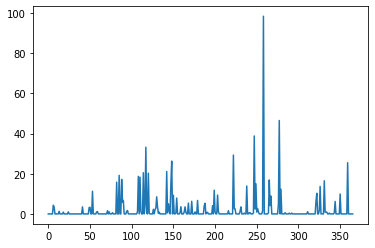

In [39]:
import matplotlib.pyplot as plt

newdata = sf_precip_2016 = precip_sf_xr['precipitation_amount'].values
plt.plot(newdata) # plotting by columns

In [40]:
sf_precip_2016.max()

98.4

In [41]:
# how many inches

max_inches = sf_precip_2016.max() / 25.4
max_inches

3.8740158081054688

In [42]:
sf_precip_2016.mean()

2.2065578

In [43]:
sf_precip_2016.sum()

807.6001

In [44]:
annual_inches = sf_precip_2016.sum() / 25.4
annual_inches

31.795279435285433

# Avg Rainfall for Sioux Falls is 27 Inches

## so 31.8 is above normal and it depends on how fast it comes down

In [45]:
result = np.where(sf_precip_2016 == sf_precip_2016.max())

In [46]:
result

(array([258]),)

In [47]:
hardest_rain_day = result[0][0]

In [48]:
hardest_rain_day = int(hardest_rain_day) + 1
hardest_rain_day

259

In [49]:
import datetime
date = datetime.datetime(2016, 1, 1) + datetime.timedelta(hardest_rain_day) #This assumes that the year is 2016
human_date = date.strftime('%Y%m%d')
human_date

'20160916'

# September 16th

# Heavy rainfall and flooding on September 16, 2016
www.weather.gov › fsd › 20160915-flooding-sesdswmnnwia
Sep 16, 2016 - 1 to 2 inches of rain fell between 1 and 2 pm in Sioux Falls with over 3 inches of rain by 3 pm producing street flooding across the city.

![r](https://media.graytvinc.com/images/810*455/Flooding+69th+and+Louise.jpg)

---
---
![w](https://scontent.ffar1-1.fna.fbcdn.net/v/t1.0-9/64790138_2769861366361473_8056461991268581376_n.jpg?_nc_cat=108&_nc_sid=110474&_nc_ohc=8nX1eg-dPuYAX-JE5FM&_nc_ht=scontent.ffar1-1.fna&oh=eeab62da5570b9ee8acd851429139a76&oe=5E913620)


# Mic Drop - Peace Out

![m](https://media.dayoftheshirt.com/images/shirts/SH9tr/teepublic_science-its-like-magic-but-real-teepublic_1556660091.large.png)